In [55]:
library(DESeq2)

In [56]:
cts = read.csv(file='../static/data/debugging/data_df.csv', header=TRUE, sep=',')
rownames(cts) = cts$gene_pk
cts$gene_pk = NULL
cts$gene_id = NULL
head(cts)

,HK1cnt,HK2cnt,HK3cnt,INF2cnt,INF3cnt,INF4cnt,M01cnt,M02cnt,M03cnt
ENSMUSG00000000001,4390,4003,5739,3005,3674,2221,4255,4587,3927
ENSMUSG00000000028,44,47,57,43,46,36,60,91,57
ENSMUSG00000000031,0,0,0,0,1,0,0,0,0
ENSMUSG00000000037,2,0,3,0,0,0,4,0,0
ENSMUSG00000000049,0,1,1,0,0,3,0,2,3
ENSMUSG00000000056,312,366,418,352,370,260,495,558,467


In [57]:
coldata = read.csv(file='../static/data/debugging/design_df.csv', header=TRUE, sep=',')
rownames(coldata) = coldata$sample # set as index
runs = coldata$sample
coldata$sample = NULL # remove the sample column
coldata

,group
HK1cnt,HK
HK2cnt,HK
HK3cnt,HK
INF2cnt,INFEC
INF3cnt,INFEC
INF4cnt,INFEC
M01cnt,UN
M02cnt,UN
M03cnt,UN


In [58]:
runs

[1] HK1cnt  HK2cnt  HK3cnt  INF2cnt INF3cnt INF4cnt M01cnt  M02cnt  M03cnt 
9 Levels: HK1cnt HK2cnt HK3cnt INF2cnt INF3cnt INF4cnt M01cnt ... M03cnt

In [59]:
dds <- DESeqDataSetFromMatrix(countData = cts,
                              colData = coldata,
                              design = ~ group)

In [60]:
dds

class: DESeqDataSet 
dim: 1579 9 
metadata(1): version
assays(1): counts
rownames(1579): ENSMUSG00000000001 ENSMUSG00000000028 ...
  ENSMUSG00000115338 -
rowData names(0):
colnames(9): HK1cnt HK2cnt ... M02cnt M03cnt
colData names(1): group

In [61]:
dds$condition <- factor(c('HK', 'HK', 'HK', 'INFEC', 'INFEC', 'INFEC', 'UN', 'UN', 'UN'))
dds$condition <- relevel(dds$condition, ref = "UN") # set control

In [62]:
runs

[1] HK1cnt  HK2cnt  HK3cnt  INF2cnt INF3cnt INF4cnt M01cnt  M02cnt  M03cnt 
9 Levels: HK1cnt HK2cnt HK3cnt INF2cnt INF3cnt INF4cnt M01cnt ... M03cnt

In [63]:
dds$sample <- runs

In [64]:
dds$run <- runs

In [65]:
head(counts(dds))

,HK1cnt,HK2cnt,HK3cnt,INF2cnt,INF3cnt,INF4cnt,M01cnt,M02cnt,M03cnt
ENSMUSG00000000001,4390,4003,5739,3005,3674,2221,4255,4587,3927
ENSMUSG00000000028,44,47,57,43,46,36,60,91,57
ENSMUSG00000000031,0,0,0,0,1,0,0,0,0
ENSMUSG00000000037,2,0,3,0,0,0,4,0,0
ENSMUSG00000000049,0,1,1,0,0,3,0,2,3
ENSMUSG00000000056,312,366,418,352,370,260,495,558,467


In [66]:
ddsColl <- collapseReplicates(dds, dds$sample, dds$run)

In [67]:
head(counts(ddsColl))

,HK1cnt,HK2cnt,HK3cnt,INF2cnt,INF3cnt,INF4cnt,M01cnt,M02cnt,M03cnt
ENSMUSG00000000001,4390,4003,5739,3005,3674,2221,4255,4587,3927
ENSMUSG00000000028,44,47,57,43,46,36,60,91,57
ENSMUSG00000000031,0,0,0,0,1,0,0,0,0
ENSMUSG00000000037,2,0,3,0,0,0,4,0,0
ENSMUSG00000000049,0,1,1,0,0,3,0,2,3
ENSMUSG00000000056,312,366,418,352,370,260,495,558,467


In [68]:
# examine the colData and column names of the collapsed data
colData(ddsColl)
colnames(ddsColl)

DataFrame with 9 rows and 5 columns
           group condition   sample      run runsCollapsed
        <factor>  <factor> <factor> <factor>   <character>
HK1cnt        HK        HK   HK1cnt   HK1cnt        HK1cnt
HK2cnt        HK        HK   HK2cnt   HK2cnt        HK2cnt
HK3cnt        HK        HK   HK3cnt   HK3cnt        HK3cnt
INF2cnt    INFEC     INFEC  INF2cnt  INF2cnt       INF2cnt
INF3cnt    INFEC     INFEC  INF3cnt  INF3cnt       INF3cnt
INF4cnt    INFEC     INFEC  INF4cnt  INF4cnt       INF4cnt
M01cnt        UN        UN   M01cnt   M01cnt        M01cnt
M02cnt        UN        UN   M02cnt   M02cnt        M02cnt
M03cnt        UN        UN   M03cnt   M03cnt        M03cnt

[1] "HK1cnt"  "HK2cnt"  "HK3cnt"  "INF2cnt" "INF3cnt" "INF4cnt" "M01cnt" 
[8] "M02cnt"  "M03cnt"

In [69]:
# check that the sum of the counts for "sample1" is the same
# as the counts in the "sample1" column in ddsColl
matchFirstLevel <- dds$sample == levels(dds$sample)[1]
stopifnot(all(rowSums(counts(dds[,matchFirstLevel])) == counts(ddsColl[,1])))

In [70]:
dds$sample

[1] HK1cnt  HK2cnt  HK3cnt  INF2cnt INF3cnt INF4cnt M01cnt  M02cnt  M03cnt 
9 Levels: HK1cnt HK2cnt HK3cnt INF2cnt INF3cnt INF4cnt M01cnt ... M03cnt

In [71]:
levels(dds$sample)

[1] "HK1cnt"  "HK2cnt"  "HK3cnt"  "INF2cnt" "INF3cnt" "INF4cnt" "M01cnt" 
[8] "M02cnt"  "M03cnt"

Keep rows that have at least 10 reads total

In [72]:
keep <- rowSums(counts(ddsColl)) >= 10
ddsColl <- ddsColl[keep,]

In [73]:
head(counts(ddsColl))

,HK1cnt,HK2cnt,HK3cnt,INF2cnt,INF3cnt,INF4cnt,M01cnt,M02cnt,M03cnt
ENSMUSG00000000001,4390,4003,5739,3005,3674,2221,4255,4587,3927
ENSMUSG00000000028,44,47,57,43,46,36,60,91,57
ENSMUSG00000000049,0,1,1,0,0,3,0,2,3
ENSMUSG00000000056,312,366,418,352,370,260,495,558,467
ENSMUSG00000000058,1910,1901,2582,928,1868,912,1875,2140,1830
ENSMUSG00000000078,10297,9329,14173,9478,9162,8990,9600,10182,9252


Differential expression analysis

In [76]:
dds <- DESeq(ddsColl)
res <- results(dds, contrast=c("group", 'UN', 'HK'))
res

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


log2 fold change (MLE): group UN vs HK 
Wald test p-value: group UN vs HK 
DataFrame with 913 rows and 6 columns
                       baseMean log2FoldChange      lfcSE       stat
                      <numeric>      <numeric>  <numeric>  <numeric>
ENSMUSG00000000001  3886.043395     -0.1530949  0.1326051 -1.1545176
ENSMUSG00000000028    52.223775      0.4641236  0.2748700  1.6885207
ENSMUSG00000000049     1.106957      1.3302161  2.1761636  0.6112666
ENSMUSG00000000056   393.565293      0.4506751  0.1470335  3.0651174
ENSMUSG00000000058  1725.719548     -0.1395405  0.2724764 -0.5121193
...                         ...            ...        ...        ...
ENSMUSG00000007891 1.617490e+05      0.1726527 0.07041873  2.4518011
ENSMUSG00000007892 3.820636e+03     -0.1952052 0.11340158 -1.7213621
ENSMUSG00000007944 1.810537e+00     -1.0247523 1.63789470 -0.6256521
ENSMUSG00000007946 2.794836e+01     -0.2734634 0.39792433 -0.6872245
ENSMUSG00000007950 2.917499e+02      0.2539178 0.13857153  

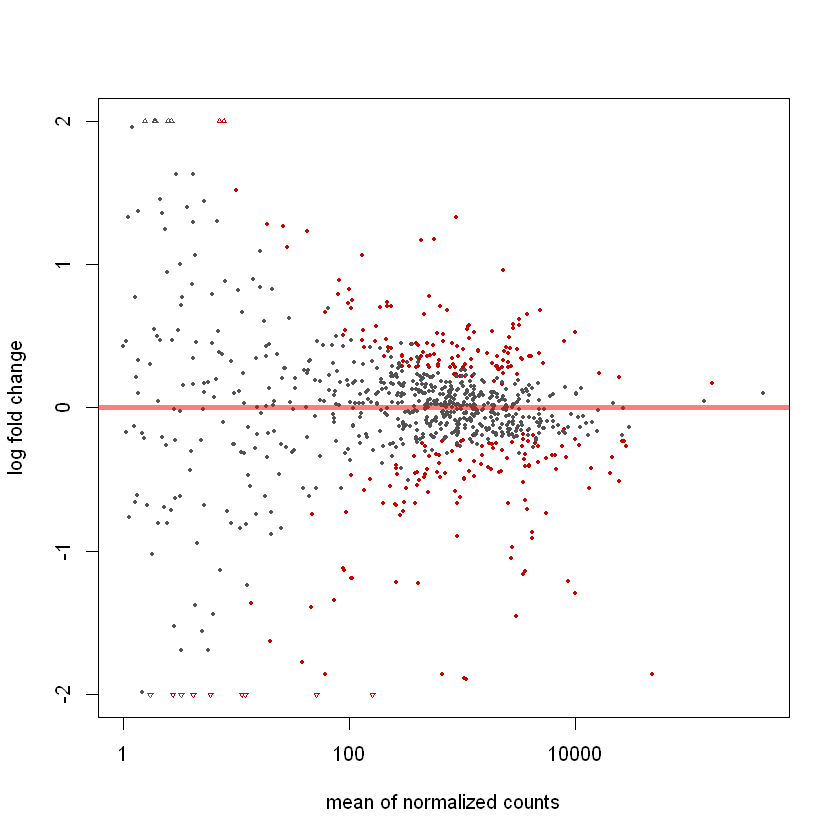

In [86]:
plotMA(res, ylim=c(-2,2))

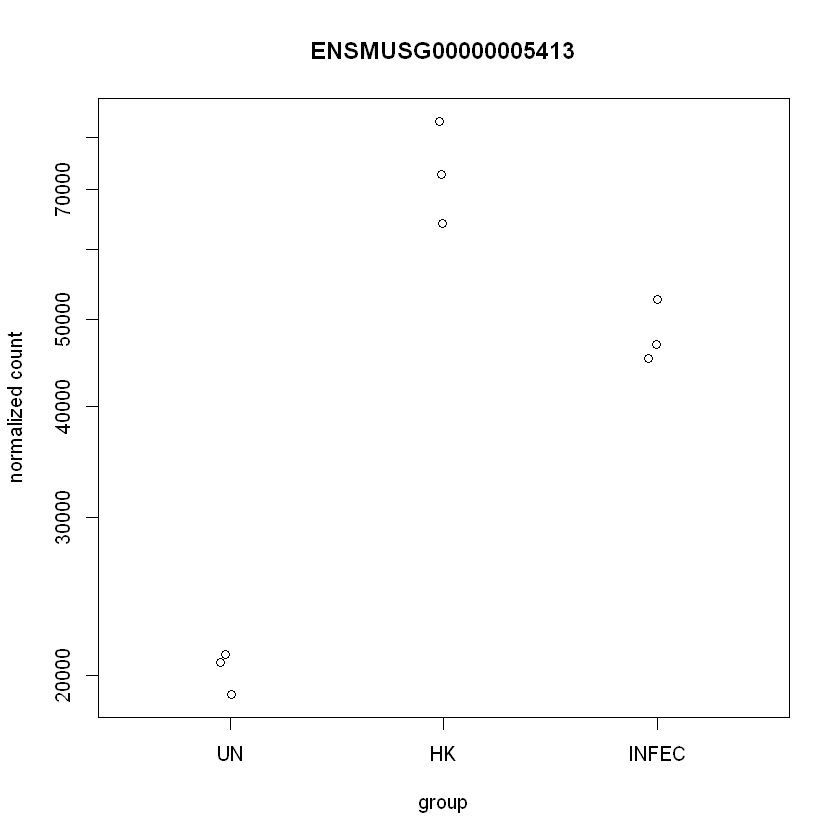

In [78]:
plotCounts(dds, gene=which.min(res$padj), intgroup="condition")

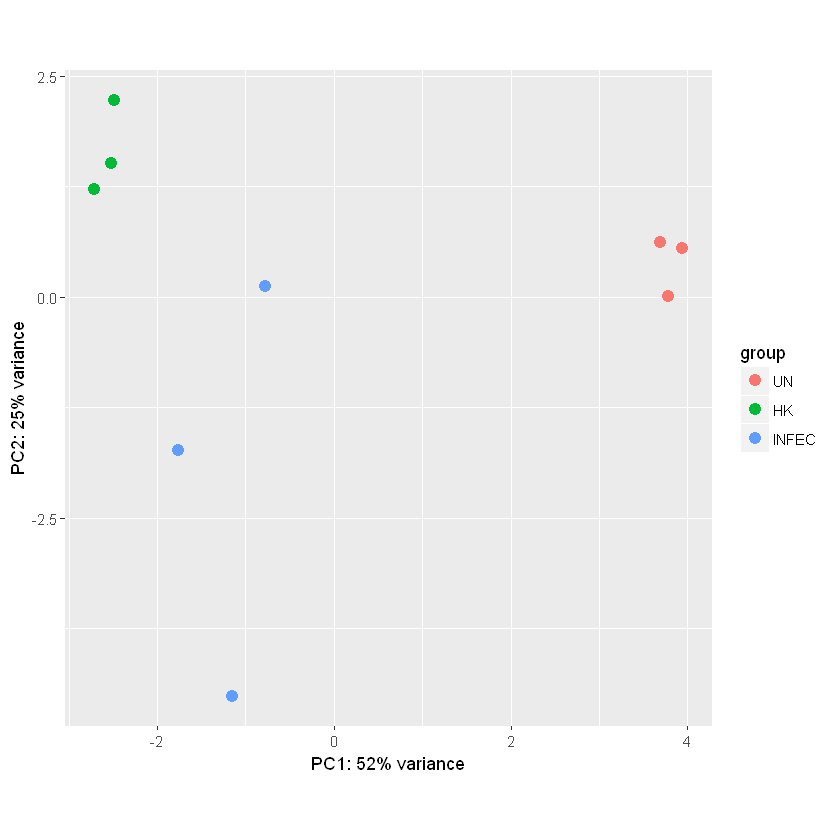

In [79]:
# vsd <- vst(dds, blind=FALSE)
rld <- rlog(dds, blind=FALSE)
plotPCA(rld, intgroup=c("condition"))

In [80]:
sampleDists <- dist(t(assay(rld)))

In [81]:
library("RColorBrewer")
library("pheatmap")

In [82]:
sampleDists

          HK1cnt   HK2cnt   HK3cnt  INF2cnt  INF3cnt  INF4cnt   M01cnt   M02cnt
HK2cnt  3.432143                                                               
HK3cnt  4.651858 3.344999                                                      
INF2cnt 4.663559 5.320533 5.609214                                             
INF3cnt 4.028435 4.414412 5.165957 3.643743                                    
INF4cnt 7.095655 7.424271 6.727357 4.904967 6.044920                           
M01cnt  7.138454 6.904380 7.230477 6.753164 5.601380 7.631682                  
M02cnt  7.367442 7.216140 7.283591 6.975769 5.942788 7.269809 2.986267         
M03cnt  7.138593 7.249086 7.761257 6.828700 5.615221 7.853546 2.797657 3.263361

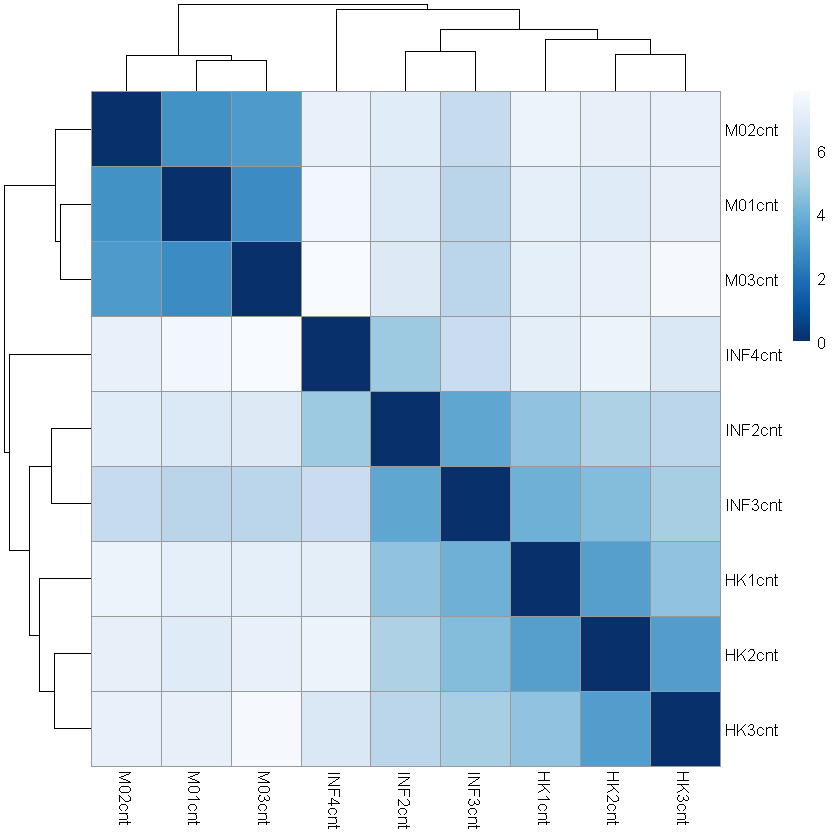

In [83]:
sampleDistMatrix <- as.matrix(sampleDists)
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix,
         clustering_distance_rows=sampleDists,
         clustering_distance_cols=sampleDists,
         col=colors)

In [84]:
resOrdered <- res[order(res$padj),]

In [85]:
write.csv(as.data.frame(res), file="UN_HK_results.csv")
write.csv(as.data.frame(resOrdered), file="UN_HK_results_ordered.csv")